<h1>Exploration

In [1]:
# Import packages

#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

In [3]:
data = pd.read_csv("Property_Assessment_Data__Historical_.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.columns

Index(['Account Number', 'Assessment Year', 'Suite', 'House Number',
       'Street Name', 'Legal Description', 'Latitude', 'Longitude',
       'Point Location', 'Neighbourhood', 'Actual Year Built', 'Garage',
       'Zoning', 'Lot Size', 'Assessed Value', 'Assessment Class 1',
       'Assessment Class % 1', 'Assessment Class 2', 'Assessment Class % 2',
       'Assessment Class 3', 'Assessment Class % 3'],
      dtype='object')

In [8]:
float_cols = ['Lot Size', 'Assessed Value']
data[float_cols] = data[float_cols].replace({'\$': '', ',': ''}, regex=True)
data[float_cols] = data[float_cols].astype('float')

In [10]:
data.describe(include= 'all')

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
count,3.384820e+06,3.384820e+06,673021,3.044353e+06,3044353,3341081,3.370980e+06,3.370980e+06,3370980,3384820,...,3384820,3384621,3.358614e+06,3.384820e+06,3384471,3.384471e+06,8437,8437.000000,1236,1236.000000
unique,NaN,NaN,3545,NaN,2981,408393,NaN,NaN,265099,424,...,2,114,NaN,NaN,5,NaN,5,NaN,5,NaN
top,NaN,NaN,201,NaN,104 STREET NW,Plan: 3779NY Block: A / Plan: 3779NY Block: ...,NaN,NaN,POINT (-113.57733 53.4349),OLIVER,...,Y,RF1,NaN,NaN,RESIDENTIAL,NaN,COMMERCIAL,NaN,FARMLAND,NaN
freq,NaN,NaN,6378,NaN,20691,369,NaN,NaN,10252,105017,...,1884590,1062633,NaN,NaN,3162569,NaN,2909,NaN,840,NaN
mean,7.392438e+06,2.016165e+03,NaN,7.944217e+03,NaN,NaN,5.352257e+01,-1.135100e+02,NaN,NaN,...,NaN,NaN,1.585533e+03,4.634372e+05,NaN,9.990211e+01,NaN,37.540476,NaN,10.016181
std,3.275672e+06,2.569942e+00,NaN,5.327885e+03,NaN,NaN,6.513529e-02,8.023532e-02,NaN,NaN,...,NaN,NaN,2.279299e+04,3.771948e+06,NaN,2.572051e+00,NaN,33.161761,NaN,17.090179
min,1.001007e+06,2.012000e+03,NaN,1.000000e+00,NaN,NaN,5.333841e+01,-1.137133e+02,NaN,NaN,...,NaN,NaN,0.000000e+00,0.000000e+00,NaN,1.000000e+00,NaN,1.000000,NaN,1.000000
25%,4.112751e+06,2.014000e+03,NaN,2.984000e+03,NaN,NaN,5.346688e+01,-1.135639e+02,NaN,NaN,...,NaN,NaN,1.501350e+02,1.855000e+05,NaN,1.000000e+02,NaN,6.000000,NaN,1.000000
50%,9.277948e+06,2.016000e+03,NaN,8.705000e+03,NaN,NaN,5.352360e+01,-1.135081e+02,NaN,NaN,...,NaN,NaN,3.981320e+02,3.175000e+05,NaN,1.000000e+02,NaN,30.000000,NaN,3.000000
75%,1.008191e+07,2.018000e+03,NaN,1.152800e+04,NaN,NaN,5.357412e+01,-1.134482e+02,NaN,NaN,...,NaN,NaN,5.851440e+02,4.175000e+05,NaN,1.000000e+02,NaN,66.000000,NaN,10.000000


In [11]:
data['Assessment Year'].value_counts()

2020    409384
2019    402419
2018    396159
2017    389274
2016    381025
2015    367386
2014    355767
2013    346108
2012    337298
Name: Assessment Year, dtype: int64

<AxesSubplot:title={'center':'Assessed Value'}, xlabel='Assessment Year'>

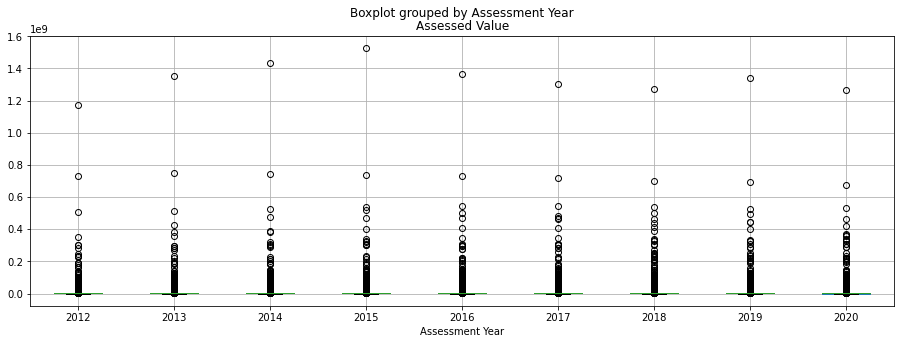

In [23]:
data.boxplot('Assessed Value', by='Assessment Year')

In [29]:
stat_by_year = data.groupby(['Assessment Year']).describe()

In [30]:
stat_by_year['Assessed Value']

,count,mean,std,min,25%,50%,75%,max
Assessment Year,,,,,,,,
2012,337298.0,425038.812228,3.331690e+06,0.0,185000.0,297500.0,389500.0,1.174998e+09
2013,346108.0,439024.436476,3.682022e+06,0.0,187000.0,302000.0,396500.0,1.354654e+09
2014,355767.0,455571.376474,3.840131e+06,0.0,188000.0,310000.0,405000.0,1.434440e+09
2015,367386.0,479722.314152,4.009622e+06,0.0,195000.0,330000.0,430000.0,1.527078e+09
2016,381025.0,486126.223287,3.856185e+06,0.0,197000.0,332500.0,435500.0,1.368145e+09
2017,389274.0,468570.237763,3.792620e+06,0.0,189500.0,326000.0,423500.0,1.303400e+09
2018,396159.0,476915.950035,3.882812e+06,0.0,184500.0,325500.0,426500.0,1.272721e+09
2019,402419.0,471004.684590,3.776848e+06,0.0,177500.0,324000.0,427000.0,1.338810e+09
2020,409384.0,461454.677213,3.695055e+06,0.0,169000.0,313000.0,414500.0,1.266912e+09


<AxesSubplot:>

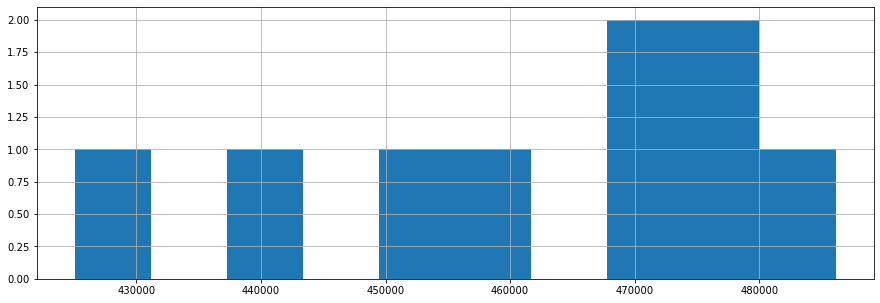

In [34]:
stat_by_year['Assessed Value']['mean'].hist()

In [ ]:
# Sample code for reference
# importing packages
import seaborn
  
# load dataset
data = seaborn.load_dataset('exercise')
  
# multiple groupby (pulse and diet both)
df = data.groupby(['pulse', 'diet']).count()['time']
  
# plot the result
df.unstack().plot()
plt.xticks(rotation=45)
plt.show()

In [59]:
#Assessed Value per year per neighbourhood
data_per_year_per_neighbourhood = data.groupby(['Assessment Year', 'Neighbourhood']).median()['Assessed Value']

In [64]:
grouped_df = data_per_year_per_neighbourhood.to_frame()

In [65]:
grouped_df.head()


Assessed Value
Assessment Year Neighbourhood                          
2012            ABBOTTSFIELD                   140500.0
                ALBANY                         163000.0
                ALBERTA AVENUE                 204750.0
                ALBERTA PARK INDUSTRIAL        665000.0
                ALDERGROVE                     340750.0

In [67]:
grouped_df = grouped_df.unstack()
grouped_df.head()

                Neighbourhood  Assessment Year
Assessed Value  ABBOTTSFIELD   2012               140500.0
                               2013               147000.0
                               2014               149500.0
                               2015               160000.0
                               2016               167000.0
dtype: float64

In [71]:
grouped_df_flat = grouped_df.reset_index()
grouped_df_flat.head()

,level_0,Neighbourhood,Assessment Year,0
0,Assessed Value,ABBOTTSFIELD,2012,140500.0
1,Assessed Value,ABBOTTSFIELD,2013,147000.0
2,Assessed Value,ABBOTTSFIELD,2014,149500.0
3,Assessed Value,ABBOTTSFIELD,2015,160000.0
4,Assessed Value,ABBOTTSFIELD,2016,167000.0


In [ ]:
grouped_df_flat = grouped_df_flat.drop(columns='level_0')

In [76]:
grouped_df_flat.columns = ['Neighbourhood', 'Assessment Year', 'Median Assessed Value']
grouped_df_flat.head()

,Neighbourhood,Assessment Year,Median Assessed Value
0,ABBOTTSFIELD,2012,140500.0
1,ABBOTTSFIELD,2013,147000.0
2,ABBOTTSFIELD,2014,149500.0
3,ABBOTTSFIELD,2015,160000.0
4,ABBOTTSFIELD,2016,167000.0


<h1>Computing Total Change

In [ ]:
data_per_year_per_neighbourhood.unstack().plot()
plt.xticks(rotation = 45)
plt.ylim()
plt.show

In [69]:
data_per_year_per_neighbourhood.index

MultiIndex([(2012,                    'ABBOTTSFIELD'),
            (2012,                          'ALBANY'),
            (2012,                  'ALBERTA AVENUE'),
            (2012,         'ALBERTA PARK INDUSTRIAL'),
            (2012,                      'ALDERGROVE'),
            (2012,                          'ALLARD'),
            (2012,                       'ALLENDALE'),
            (2012,                       'AMBLESIDE'),
            (2012,                  'ANTHONY HENDAY'),
            (2012,      'ANTHONY HENDAY CASTLEDOWNS'),
            ...
            (2020,                      'WINDERMERE'),
            (2020,                 'WINDERMERE AREA'),
            (2020,                    'WINDSOR PARK'),
            (2020, 'WINTERBURN INDUSTRIAL AREA EAST'),
            (2020, 'WINTERBURN INDUSTRIAL AREA WEST'),
            (2020,                       'WOODCROFT'),
            (2020,        'YELLOWHEAD CORRIDOR EAST'),
            (2020,        'YELLOWHEAD CORRIDOR WE

In [ ]:
data_per_year_per_neighbourhood

In [141]:
data_per_year_per_neighbourhood.transpose

<bound method IndexOpsMixin.transpose of Assessment Year  Neighbourhood           
2012             ABBOTTSFIELD                 140500.0
                 ALBANY                       163000.0
                 ALBERTA AVENUE               204750.0
                 ALBERTA PARK INDUSTRIAL      665000.0
                 ALDERGROVE                   340750.0
                                               ...    
2020             WOODCROFT                    328500.0
                 YELLOWHEAD CORRIDOR EAST    1001500.0
                 YELLOWHEAD CORRIDOR WEST     682500.0
                 YORK                         289000.0
                 YOUNGSTOWN INDUSTRIAL       2896000.0
Name: Assessed Value, Length: 3555, dtype: float64>

In [139]:
data_per_year_per_neighbourhood.transpose()

Assessment Year  Neighbourhood           
2012             ABBOTTSFIELD                 140500.0
                 ALBANY                       163000.0
                 ALBERTA AVENUE               204750.0
                 ALBERTA PARK INDUSTRIAL      665000.0
                 ALDERGROVE                   340750.0
                                               ...    
2020             WOODCROFT                    328500.0
                 YELLOWHEAD CORRIDOR EAST    1001500.0
                 YELLOWHEAD CORRIDOR WEST     682500.0
                 YORK                         289000.0
                 YOUNGSTOWN INDUSTRIAL       2896000.0
Name: Assessed Value, Length: 3555, dtype: float64

In [137]:
value_per_year_per_neighbourhood = data_per_year_per_neighbourhood.reset_index()
value_per_year_per_neighbourhood.head()

,Assessment Year,Neighbourhood,Assessed Value
0,2012,ABBOTTSFIELD,140500.0
1,2012,ALBANY,163000.0
2,2012,ALBERTA AVENUE,204750.0
3,2012,ALBERTA PARK INDUSTRIAL,665000.0
4,2012,ALDERGROVE,340750.0


In [83]:
med_val_per_year_per_neigh = value_per_year_per_neighbourhood.transpose()
med_val_per_year_per_neigh.head()

Assessment Year,2012,2013,2014,2015,2016,2017,2018,2019,2020
Neighbourhood,,,,,,,,,
ABBOTTSFIELD,140500.0,147000.0,149500.0,160000.0,167000.0,161000.0,153000.0,151500.0,143000.0
ALBANY,163000.0,195500.0,163500.0,179500.0,187000.0,179500.0,177250.0,178000.0,169000.0
ALBERTA AVENUE,204750.0,209500.0,220500.0,233000.0,230500.0,235000.0,234000.0,228500.0,213000.0
ALBERTA PARK INDUSTRIAL,665000.0,609000.0,707500.0,755500.0,838500.0,740000.0,668500.0,883000.0,803750.0
ALDERGROVE,340750.0,345000.0,348500.0,367500.0,372000.0,362250.0,361250.0,353000.0,341500.0


In [84]:
med_val_per_y_per_n = med_val_per_year_per_neigh.reset_index()
med_val_per_y_per_n.head()

Assessment Year,Neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTTSFIELD,140500.0,147000.0,149500.0,160000.0,167000.0,161000.0,153000.0,151500.0,143000.0
1,ALBANY,163000.0,195500.0,163500.0,179500.0,187000.0,179500.0,177250.0,178000.0,169000.0
2,ALBERTA AVENUE,204750.0,209500.0,220500.0,233000.0,230500.0,235000.0,234000.0,228500.0,213000.0
3,ALBERTA PARK INDUSTRIAL,665000.0,609000.0,707500.0,755500.0,838500.0,740000.0,668500.0,883000.0,803750.0
4,ALDERGROVE,340750.0,345000.0,348500.0,367500.0,372000.0,362250.0,361250.0,353000.0,341500.0


In [88]:
med_val_per_y_per_n[med_val_per_y_per_n['Neighbourhood']=='ALBANY'][2012].mean()

163000.0

In [89]:
med_val_per_y_per_n.columns

Index(['Neighbourhood', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object', name='Assessment Year')

In [92]:
med_val_per_y_per_n['diff_12_13'] = med_val_per_y_per_n[2013]-med_val_per_y_per_n[2012]
med_val_per_y_per_n['diff_13_14'] = med_val_per_y_per_n[2014]-med_val_per_y_per_n[2013]
med_val_per_y_per_n['diff_14_15'] = med_val_per_y_per_n[2015]-med_val_per_y_per_n[2014]
med_val_per_y_per_n['diff_15_16'] = med_val_per_y_per_n[2016]-med_val_per_y_per_n[2015]
med_val_per_y_per_n['diff_16_17'] = med_val_per_y_per_n[2017]-med_val_per_y_per_n[2016]
med_val_per_y_per_n['diff_17_18'] = med_val_per_y_per_n[2018]-med_val_per_y_per_n[2017]
med_val_per_y_per_n['diff_18_19'] = med_val_per_y_per_n[2019]-med_val_per_y_per_n[2018]
med_val_per_y_per_n['diff_19_20'] = med_val_per_y_per_n[2020]-med_val_per_y_per_n[2019]
med_val_per_y_per_n.head()

Assessment Year,Neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,diff_12_13,diff_13_14,diff_14_15,diff_15_16,diff_16_17,diff_17_18,diff_18_19,diff_19_20
0,ABBOTTSFIELD,140500.0,147000.0,149500.0,160000.0,167000.0,161000.0,153000.0,151500.0,143000.0,6500.0,2500.0,10500.0,7000.0,-6000.0,-8000.0,-1500.0,-8500.0
1,ALBANY,163000.0,195500.0,163500.0,179500.0,187000.0,179500.0,177250.0,178000.0,169000.0,32500.0,-32000.0,16000.0,7500.0,-7500.0,-2250.0,750.0,-9000.0
2,ALBERTA AVENUE,204750.0,209500.0,220500.0,233000.0,230500.0,235000.0,234000.0,228500.0,213000.0,4750.0,11000.0,12500.0,-2500.0,4500.0,-1000.0,-5500.0,-15500.0
3,ALBERTA PARK INDUSTRIAL,665000.0,609000.0,707500.0,755500.0,838500.0,740000.0,668500.0,883000.0,803750.0,-56000.0,98500.0,48000.0,83000.0,-98500.0,-71500.0,214500.0,-79250.0
4,ALDERGROVE,340750.0,345000.0,348500.0,367500.0,372000.0,362250.0,361250.0,353000.0,341500.0,4250.0,3500.0,19000.0,4500.0,-9750.0,-1000.0,-8250.0,-11500.0


In [93]:
med_val_per_y_per_n['avg_diff'] = (med_val_per_y_per_n['diff_12_13']+med_val_per_y_per_n['diff_13_14']+med_val_per_y_per_n['diff_14_15']+med_val_per_y_per_n['diff_15_16']+med_val_per_y_per_n['diff_16_17']+med_val_per_y_per_n['diff_17_18']+med_val_per_y_per_n['diff_18_19']+med_val_per_y_per_n['diff_19_20'])/8

In [94]:
med_val_per_y_per_n.head()

Assessment Year,Neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,diff_12_13,diff_13_14,diff_14_15,diff_15_16,diff_16_17,diff_17_18,diff_18_19,diff_19_20,avg_diff
0,ABBOTTSFIELD,140500.0,147000.0,149500.0,160000.0,167000.0,161000.0,153000.0,151500.0,143000.0,6500.0,2500.0,10500.0,7000.0,-6000.0,-8000.0,-1500.0,-8500.0,312.50
1,ALBANY,163000.0,195500.0,163500.0,179500.0,187000.0,179500.0,177250.0,178000.0,169000.0,32500.0,-32000.0,16000.0,7500.0,-7500.0,-2250.0,750.0,-9000.0,750.00
2,ALBERTA AVENUE,204750.0,209500.0,220500.0,233000.0,230500.0,235000.0,234000.0,228500.0,213000.0,4750.0,11000.0,12500.0,-2500.0,4500.0,-1000.0,-5500.0,-15500.0,1031.25
3,ALBERTA PARK INDUSTRIAL,665000.0,609000.0,707500.0,755500.0,838500.0,740000.0,668500.0,883000.0,803750.0,-56000.0,98500.0,48000.0,83000.0,-98500.0,-71500.0,214500.0,-79250.0,17343.75
4,ALDERGROVE,340750.0,345000.0,348500.0,367500.0,372000.0,362250.0,361250.0,353000.0,341500.0,4250.0,3500.0,19000.0,4500.0,-9750.0,-1000.0,-8250.0,-11500.0,93.75


In [95]:
med_val_per_y_per_n['avg_diff'].median()

1375.0

In [96]:
inc_med_val_per_y_per_n = med_val_per_y_per_n[med_val_per_y_per_n['avg_diff']>med_val_per_y_per_n['avg_diff'].median()]

In [107]:
inc_neighbourhoods = inc_med_val_per_y_per_n['Neighbourhood']

In [117]:
inc_top_20 = inc_med_val_per_y_per_n.nlargest(20, 'avg_diff')
inc_top_20_neighbourhood = inc_top_20['Neighbourhood']

<AxesSubplot:>

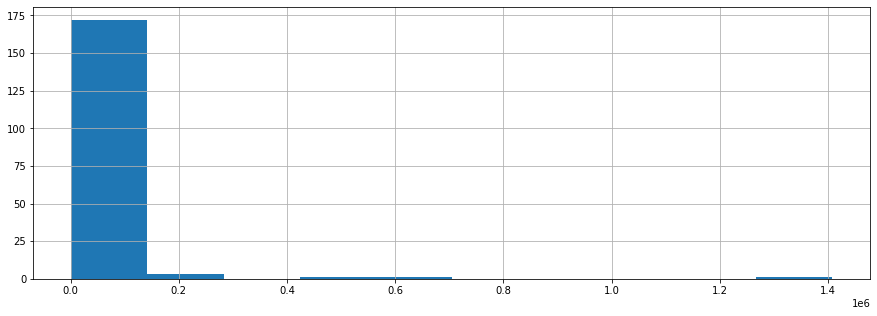

In [97]:
inc_med_val_per_y_per_n['avg_diff'].hist()

<AxesSubplot:>

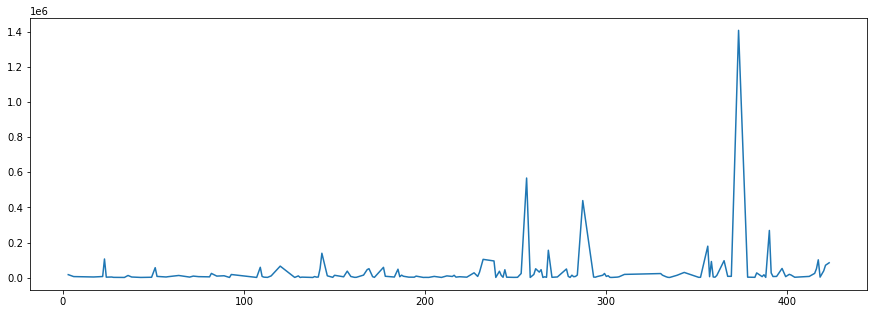

In [99]:
inc_med_val_per_y_per_n['avg_diff'].plot()

In [101]:
inc_med_val_plt = inc_med_val_per_y_per_n[['Neighbourhood', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]].transpose()
inc_med_val_plt.head()

,3,5,6,17,22,23,24,27,28,32,...,402,404,412,415,416,417,418,420,421,423
Assessment Year,,,,,,,,,,,,,,,,,,,,,
Neighbourhood,ALBERTA PARK INDUSTRIAL,ALLARD,ALLENDALE,ANTHONY HENDAY SOUTH,ARGYLL,ARMSTRONG INDUSTRIAL,ASPEN GARDENS,AVONMORE,BALWIN,BATURYN,...,WESTBROOK ESTATE,WESTRIDGE,WILSON INDUSTRIAL,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YOUNGSTOWN INDUSTRIAL
2012,665000.0,274500.0,348000.0,23000.0,320000.0,2717750.0,446500.0,331000.0,253000.0,297500.0,...,802500.0,519000.0,376000.0,698000.0,499000.0,134500.0,302000.0,689500.0,115500.0,2217000.0
2013,609000.0,346500.0,370500.0,21000.0,335000.0,2790250.0,439500.0,349000.0,259500.0,302750.0,...,823250.0,480000.0,386500.0,684000.0,600000.0,124500.0,305000.0,677500.0,900000.0,1736000.0
2014,707500.0,384750.0,371000.0,10500.0,341500.0,3058500.0,455250.0,348000.0,271000.0,315500.0,...,811750.0,509000.0,413500.0,708750.0,730000.0,135000.0,307000.0,769000.0,1006750.0,2628750.0
2015,755500.0,381000.0,406000.0,14500.0,375500.0,3042000.0,489000.0,380000.0,300500.0,323250.0,...,882500.0,551000.0,412000.0,763750.0,707750.0,141000.0,343000.0,821500.0,1063500.0,2827500.0


In [102]:
inc_med_val_plt2 = inc_med_val_plt.unstack()
inc_med_val_plt2.head()

   Assessment Year
3  Neighbourhood      ALBERTA PARK INDUSTRIAL
   2012                              665000.0
   2013                              609000.0
   2014                              707500.0
   2015                              755500.0
dtype: object

In [103]:
inc_med_val_plt3 = inc_med_val_plt.reset_index()
inc_med_val_plt3.head()

,Assessment Year,3,5,6,17,22,23,24,27,28,...,402,404,412,415,416,417,418,420,421,423
0,Neighbourhood,ALBERTA PARK INDUSTRIAL,ALLARD,ALLENDALE,ANTHONY HENDAY SOUTH,ARGYLL,ARMSTRONG INDUSTRIAL,ASPEN GARDENS,AVONMORE,BALWIN,...,WESTBROOK ESTATE,WESTRIDGE,WILSON INDUSTRIAL,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YOUNGSTOWN INDUSTRIAL
1,2012,665000.0,274500.0,348000.0,23000.0,320000.0,2717750.0,446500.0,331000.0,253000.0,...,802500.0,519000.0,376000.0,698000.0,499000.0,134500.0,302000.0,689500.0,115500.0,2217000.0
2,2013,609000.0,346500.0,370500.0,21000.0,335000.0,2790250.0,439500.0,349000.0,259500.0,...,823250.0,480000.0,386500.0,684000.0,600000.0,124500.0,305000.0,677500.0,900000.0,1736000.0
3,2014,707500.0,384750.0,371000.0,10500.0,341500.0,3058500.0,455250.0,348000.0,271000.0,...,811750.0,509000.0,413500.0,708750.0,730000.0,135000.0,307000.0,769000.0,1006750.0,2628750.0
4,2015,755500.0,381000.0,406000.0,14500.0,375500.0,3042000.0,489000.0,380000.0,300500.0,...,882500.0,551000.0,412000.0,763750.0,707750.0,141000.0,343000.0,821500.0,1063500.0,2827500.0


In [ ]:
med_val_per_year_per_neigh['total_inc'] = med_val_per_year_per_neigh['Assessment Year']['2020']-med_val_per_year_per_neigh['Assessment Year']['2012']

<h1>Exploring Mixed vs Non Mixed Property

<h1>Exploring 2020 data

In [12]:
data_20 = data[data['Assessment Year']==2020]

In [14]:
data_20['Assessed Value'].describe()

count    4.093840e+05
mean     4.614547e+05
std      3.695055e+06
min      0.000000e+00
25%      1.690000e+05
50%      3.130000e+05
75%      4.145000e+05
max      1.266912e+09
Name: Assessed Value, dtype: float64

<AxesSubplot:title={'center':'Assessed Value'}, xlabel='Neighbourhood'>

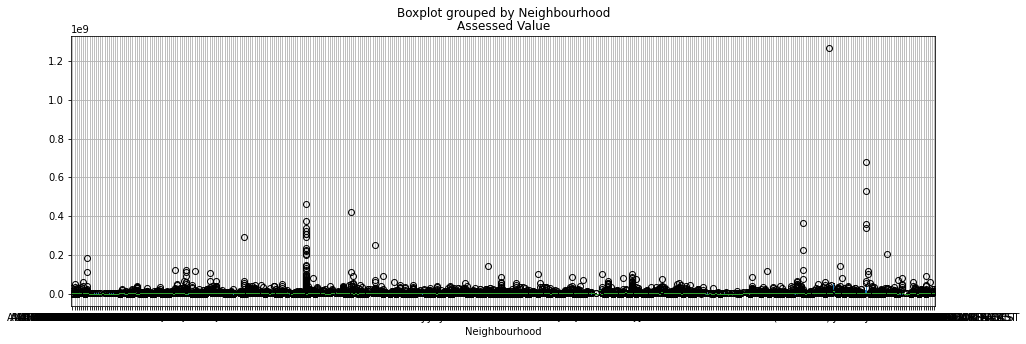

In [22]:
data_20.boxplot('Assessed Value', by='Neighbourhood')

<AxesSubplot:>

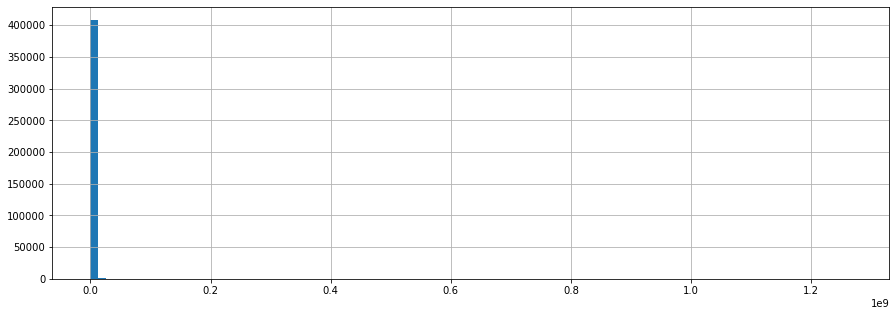

In [20]:
data_20['Assessed Value'].hist(bins=100)

In [15]:
data_20['Lot Size'].describe()

count    4.065590e+05
mean     1.556855e+03
std      1.827734e+04
min      0.000000e+00
25%      1.262700e+02
50%      3.785380e+02
75%      5.744880e+02
max      1.465717e+06
Name: Lot Size, dtype: float64

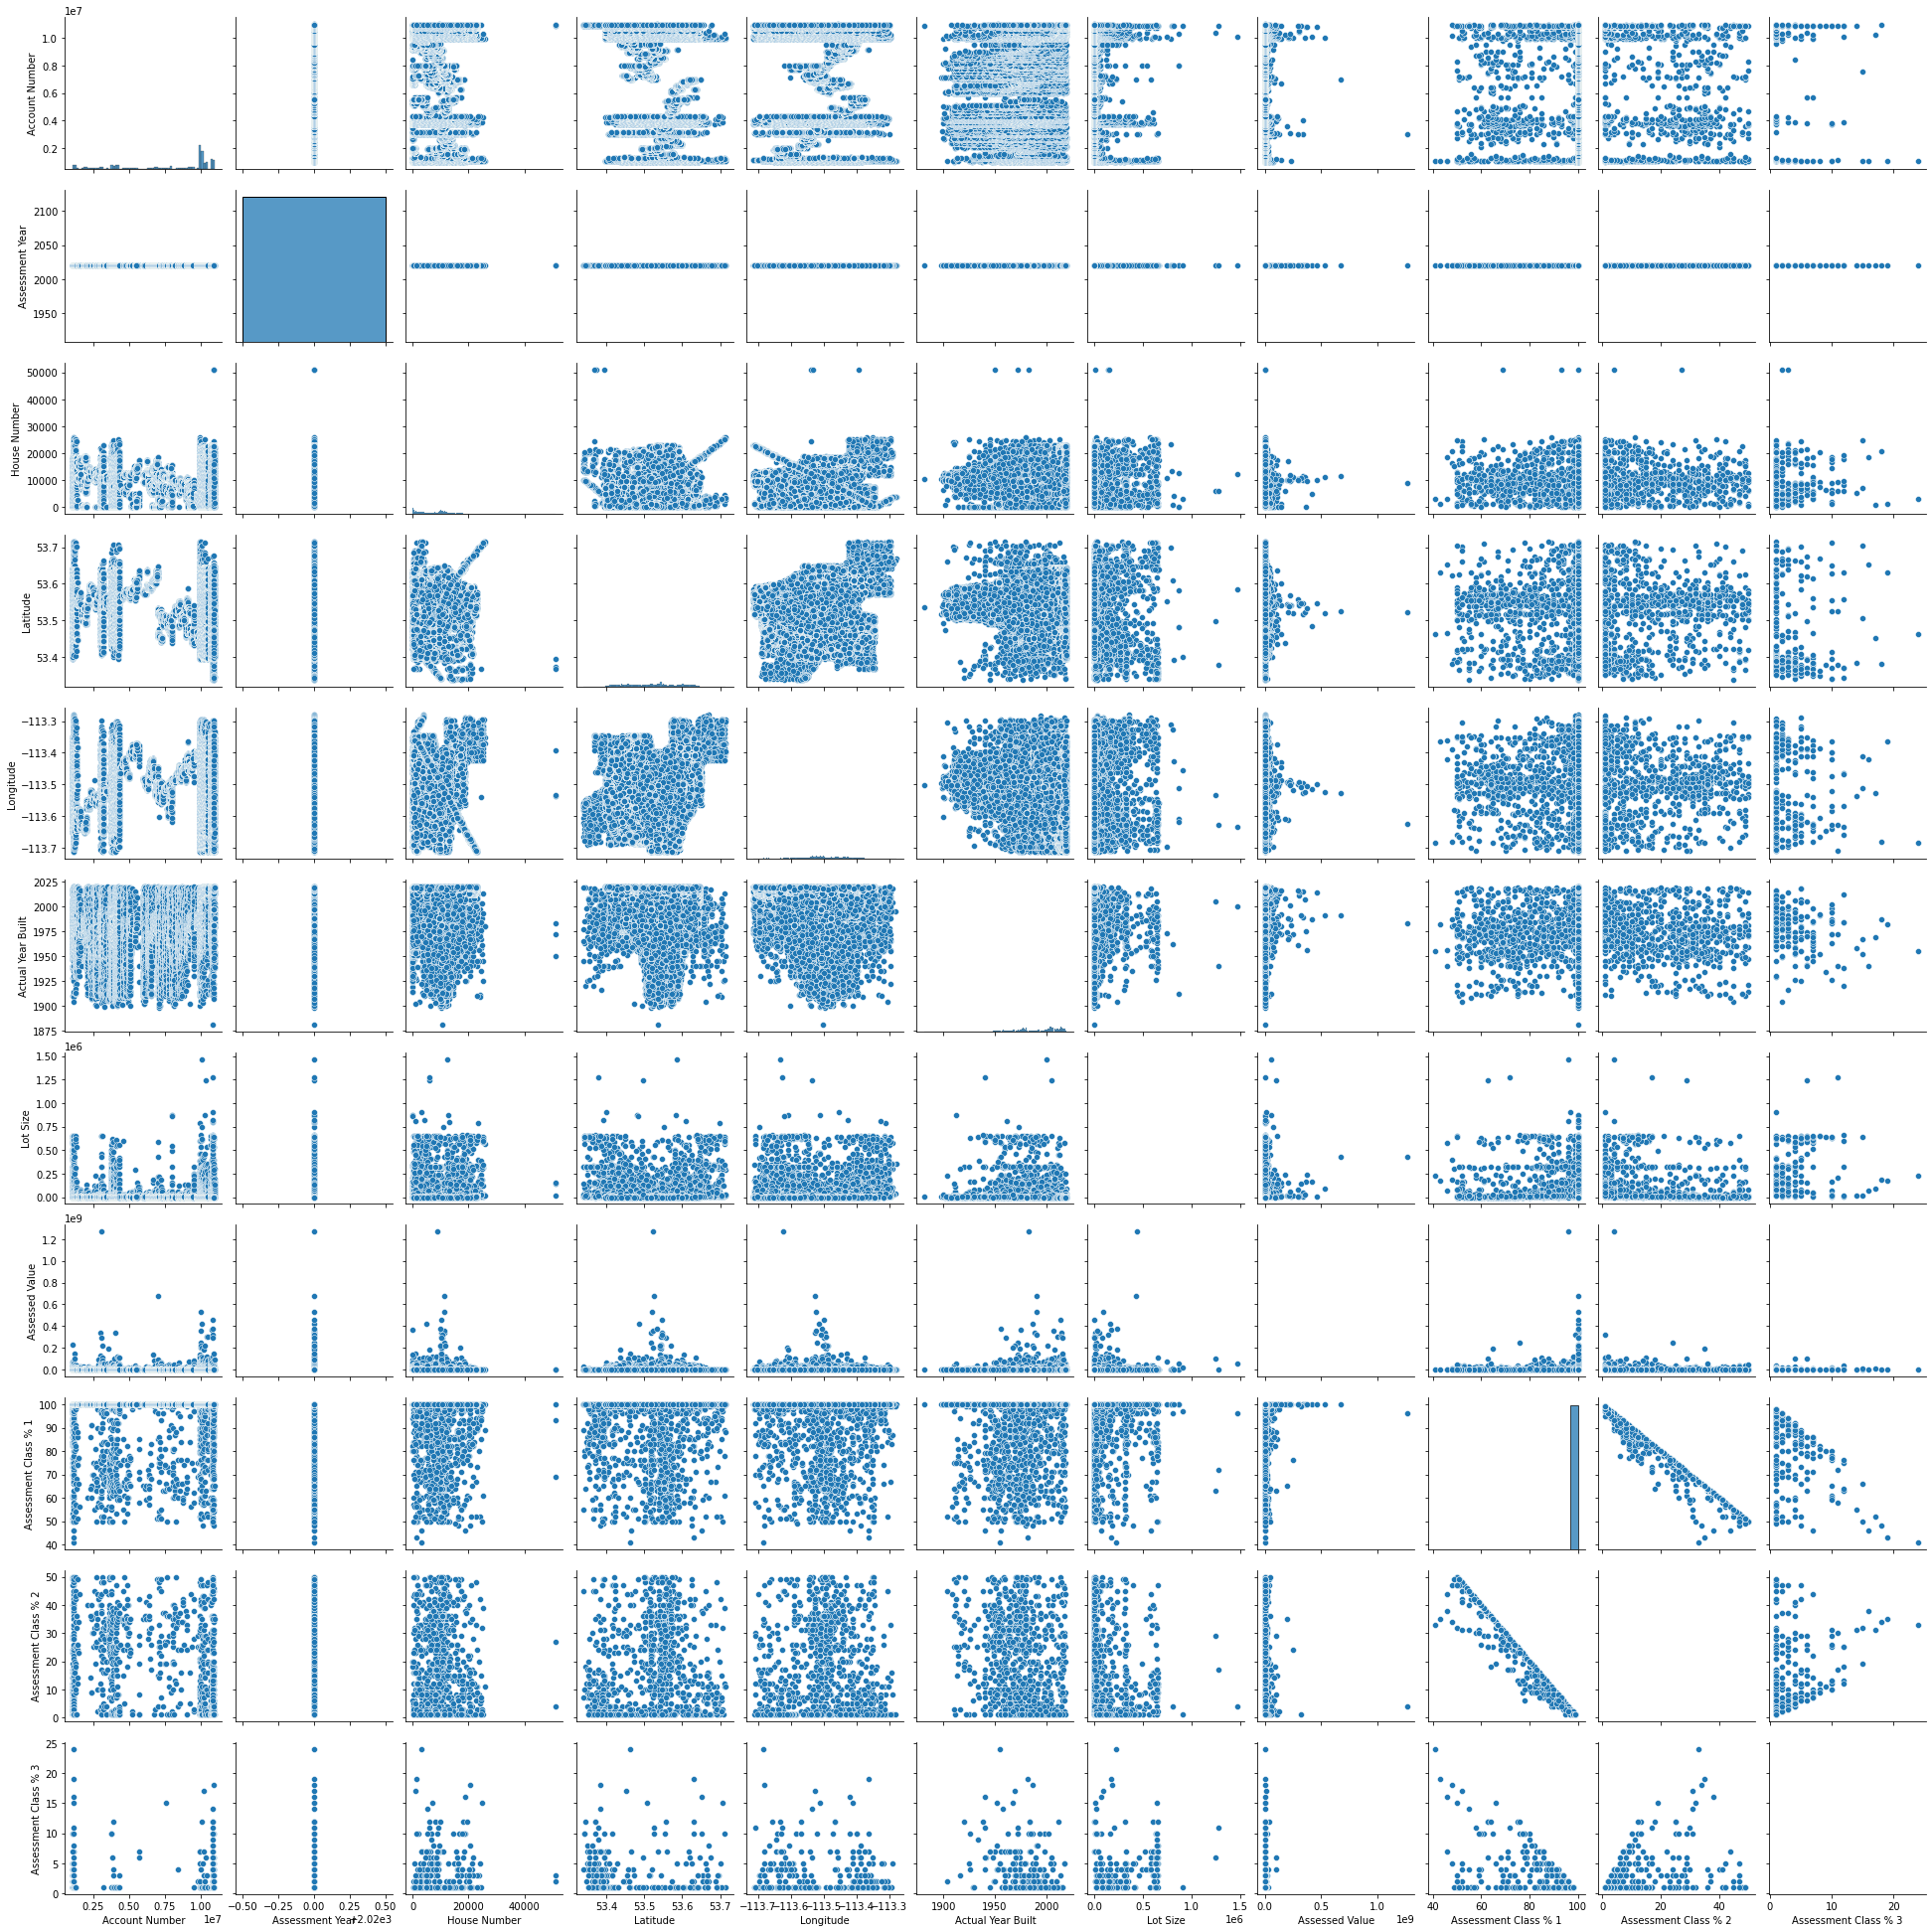

In [136]:
sns.pairplot(data_20)

<h1>Filtering neighbourhoods with avg increase in value that is less than the median

In [109]:
grouped_df_flat['Neighbourhood']

0                ABBOTTSFIELD
1                ABBOTTSFIELD
2                ABBOTTSFIELD
3                ABBOTTSFIELD
4                ABBOTTSFIELD
                ...          
3811    YOUNGSTOWN INDUSTRIAL
3812    YOUNGSTOWN INDUSTRIAL
3813    YOUNGSTOWN INDUSTRIAL
3814    YOUNGSTOWN INDUSTRIAL
3815    YOUNGSTOWN INDUSTRIAL
Name: Neighbourhood, Length: 3816, dtype: object

In [111]:
inc_grouped_df_flat = grouped_df_flat[grouped_df_flat['Neighbourhood'].isin(inc_neighbourhoods)]
inc_grouped_df_flat.head()

,Neighbourhood,Assessment Year,Median Assessed Value
27,ALBERTA PARK INDUSTRIAL,2012,665000.0
28,ALBERTA PARK INDUSTRIAL,2013,609000.0
29,ALBERTA PARK INDUSTRIAL,2014,707500.0
30,ALBERTA PARK INDUSTRIAL,2015,755500.0
31,ALBERTA PARK INDUSTRIAL,2016,838500.0


In [ ]:
sns.lineplot(x = inc_grouped_df_flat['Assessment Year'], y = inc_grouped_df_flat['Median Assessed Value'], hue = inc_grouped_df_flat['Neighbourhood'])

In [115]:
inc_grouped_df_flat_top_20 = inc_grouped_df_flat.nlargest(20,'Median Assessed Value')
inc_grouped_df_flat_top_20.head()

,Neighbourhood,Assessment Year,Median Assessed Value
2308,MILL WOODS PARK,2016,21779750.0
2307,MILL WOODS PARK,2015,21335000.0
2309,MILL WOODS PARK,2017,20684000.0
2311,MILL WOODS PARK,2019,20567250.0
2312,MILL WOODS PARK,2020,20182250.0


<AxesSubplot:xlabel='Assessment Year', ylabel='Median Assessed Value'>

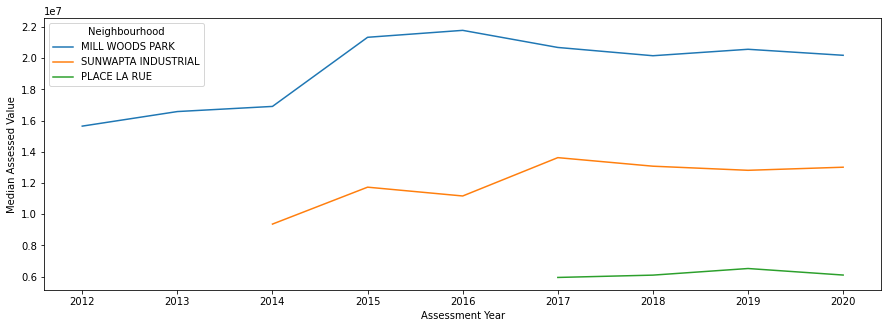

In [116]:
sns.lineplot(x = inc_grouped_df_flat_top_20['Assessment Year'], y = inc_grouped_df_flat_top_20['Median Assessed Value'], hue = inc_grouped_df_flat_top_20['Neighbourhood'])

In [118]:
inc_grouped_df_flat_top_20 = grouped_df_flat[grouped_df_flat['Neighbourhood'].isin(inc_top_20_neighbourhood)]
inc_grouped_df_flat_top_20.head()

,Neighbourhood,Assessment Year,Median Assessed Value
207,ARMSTRONG INDUSTRIAL,2012,2717750.0
208,ARMSTRONG INDUSTRIAL,2013,2790250.0
209,ARMSTRONG INDUSTRIAL,2014,3058500.0
210,ARMSTRONG INDUSTRIAL,2015,3042000.0
211,ARMSTRONG INDUSTRIAL,2016,3209750.0


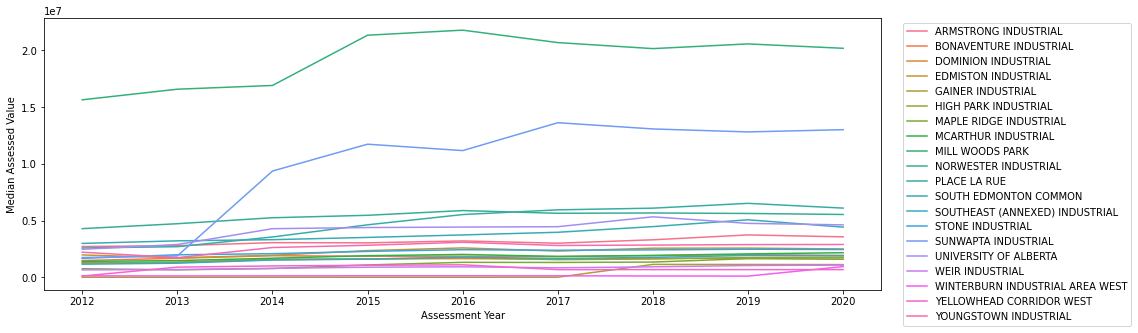

In [120]:
sns.lineplot(x = inc_grouped_df_flat_top_20['Assessment Year'], y = inc_grouped_df_flat_top_20['Median Assessed Value'], hue = inc_grouped_df_flat_top_20['Neighbourhood'])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

In [121]:
data_top_20 = data[data['Neighbourhood'].isin(inc_top_20_neighbourhood)]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'ARMSTRONG INDUSTRIAL'),
  Text(2, 0, 'BONAVENTURE INDUSTRIAL'),
  Text(3, 0, 'DOMINION INDUSTRIAL'),
  Text(4, 0, 'EDMISTON INDUSTRIAL'),
  Text(5, 0, 'GAINER INDUSTRIAL'),
  Text(6, 0, 'HIGH PARK INDUSTRIAL'),
  Text(7, 0, 'MAPLE RIDGE INDUSTRIAL'),
  Text(8, 0, 'MCARTHUR INDUSTRIAL'),
  Text(9, 0, 'MILL WOODS PARK'),
  Text(10, 0, 'NORWESTER INDUSTRIAL'),
  Text(11, 0, 'PLACE LA RUE'),
  Text(12, 0, 'SOUTH EDMONTON COMMON'),
  Text(13, 0, 'SOUTHEAST (ANNEXED) INDUSTRIAL'),
  Text(14, 0, 'STONE INDUSTRIAL'),
  Text(15, 0, 'SUNWAPTA INDUSTRIAL'),
  Text(16, 0, 'UNIVERSITY OF ALBERTA'),
  Text(17, 0, 'WEIR INDUSTRIAL'),
  Text(18, 0, 'WINTERBURN INDUSTRIAL AREA WEST'),
  Text(19, 0, 'YELLOWHEAD CORRIDOR WEST'),
  Text(20, 0, 'YOUNGSTOWN INDUSTRIAL')])

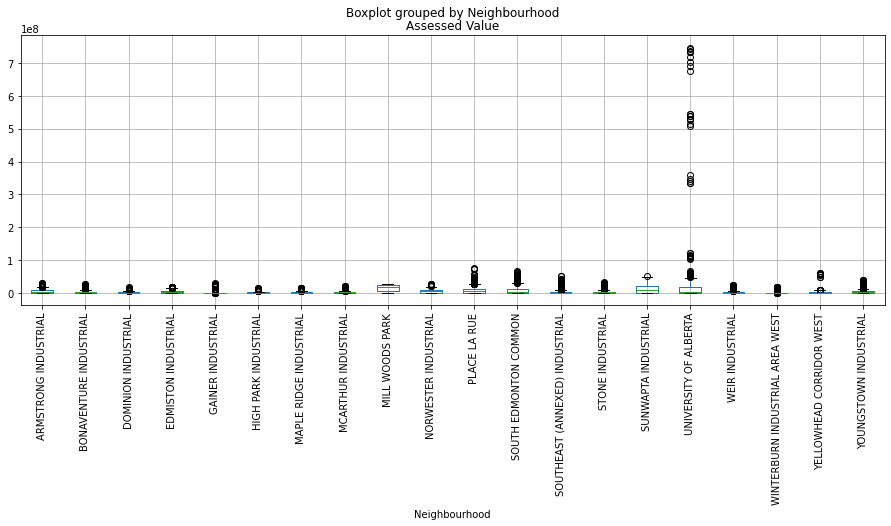

In [125]:
data_top_20.boxplot('Assessed Value', by = 'Neighbourhood')
plt.xticks(rotation=90)

In [126]:
data_top_20['Assessed Value'].value_counts()

10000.0      478
9500.0       255
7500.0       246
10500.0      221
7000.0       194
            ... 
1674000.0      1
3590500.0      1
421500.0       1
2539000.0      1
3088000.0      1
Name: Assessed Value, Length: 8678, dtype: int64

<h1>Assessed Value per Lot Size per Neighbourhood

In [127]:
data['Assessed Value per Lot Size'] = data['Assessed Value']/data['Lot Size']

In [133]:
data.replace(np.inf, np.NaN, inplace=True)

In [134]:
data['Assessed Value per Lot Size'].value_counts()

0.000000       9607
761.035008     2327
1796.798432    1991
2137.208805    1784
3500.000000    1582
               ... 
509.635649        1
814.216640        1
1010.907091       1
525.319770        1
576.578691        1
Name: Assessed Value per Lot Size, Length: 2406264, dtype: int64

<AxesSubplot:>

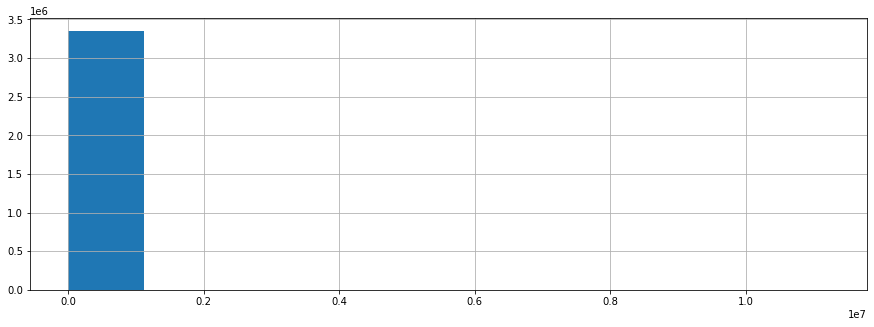

In [135]:
data['Assessed Value per Lot Size'].hist()

In [149]:
val_per_lotSize_per_yearNeigh = data.groupby(['Assessment Year', 'Neighbourhood']).median()['Assessed Value per Lot Size']

In [150]:
val_per_lotSize_per_yearNeigh.head()

Assessment Year  Neighbourhood          
2012             ABBOTTSFIELD               647.202949
                 ALBANY                     387.064168
                 ALBERTA AVENUE             539.368647
                 ALBERTA PARK INDUSTRIAL    421.191646
                 ALDERGROVE                 632.618032
Name: Assessed Value per Lot Size, dtype: float64

In [151]:
val_per_lotSize_per_yearNeigh2 = val_per_lotSize_per_yearNeigh.unstack()

In [152]:
val_per_lotSize_per_yearNeigh2.head()

Neighbourhood,ABBOTTSFIELD,ALBANY,ALBERTA AVENUE,ALBERTA PARK INDUSTRIAL,ALDERGROVE,ALLARD,ALLENDALE,AMBLESIDE,ANTHONY HENDAY,ANTHONY HENDAY BIG LAKE,...,WINDERMERE AREA,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YORK,YOUNGSTOWN INDUSTRIAL
Assessment Year,,,,,,,,,,,,,,,,,,,,,
2012,647.202949,387.064168,539.368647,421.191646,632.618032,389.453965,688.092697,1311.030569,4.948691,NaN,...,387.766141,802.114237,113.699156,82.397347,513.654954,NaN,321.290491,55.951764,518.374503,347.896440
2013,659.810798,742.424843,550.250110,433.446577,642.831822,852.990771,736.584251,1260.183250,4.948505,4.947981,...,1.243516,789.018005,124.705321,86.938788,518.040302,NaN,310.631647,85.144660,521.044692,327.672860
2014,697.634347,577.449414,580.363335,483.615316,643.655310,1073.856336,729.942328,1309.900666,4.925186,4.945812,...,0.078414,825.379159,132.990783,107.054944,521.310913,NaN,351.469669,74.450484,545.627184,292.153733
2015,714.444813,1128.838232,608.870206,462.277580,668.097917,1164.551325,799.286026,1430.613315,4.916172,4.937956,...,0.078414,883.983653,158.612541,98.962238,581.678450,NaN,356.601467,106.396692,559.007528,440.650407
2016,750.167054,1201.696927,604.986174,491.779741,674.208569,1202.066416,839.192471,1511.904866,4.653527,4.529422,...,0.078414,927.608742,167.304348,106.361283,596.060253,NaN,362.845943,73.641030,573.766536,487.540453


In [153]:
val_per_lotSize_per_yearNeigh2 = val_per_lotSize_per_yearNeigh2.transpose()

In [154]:
val_per_lotSize_per_yearNeigh2.head()

Assessment Year,2012,2013,2014,2015,2016,2017,2018,2019,2020
Neighbourhood,,,,,,,,,
ABBOTTSFIELD,647.202949,659.810798,697.634347,714.444813,750.167054,724.951355,701.836964,680.646658,643.000332
ALBANY,387.064168,742.424843,577.449414,1128.838232,1201.696927,1158.785481,1133.941606,1164.021164,1114.962155
ALBERTA AVENUE,539.368647,550.250110,580.363335,608.870206,604.986174,618.314061,618.428349,606.319315,568.252881
ALBERTA PARK INDUSTRIAL,421.191646,433.446577,483.615316,462.277580,491.779741,503.859156,490.646912,504.902538,472.564201
ALDERGROVE,632.618032,642.831822,643.655310,668.097917,674.208569,655.630862,641.269144,626.349109,610.224730


In [155]:
val_per_lotSize_per_yearNeigh2 = val_per_lotSize_per_yearNeigh2.reset_index()

In [156]:
val_per_lotSize_per_yearNeigh2.head()

Assessment Year,Neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTTSFIELD,647.202949,659.810798,697.634347,714.444813,750.167054,724.951355,701.836964,680.646658,643.000332
1,ALBANY,387.064168,742.424843,577.449414,1128.838232,1201.696927,1158.785481,1133.941606,1164.021164,1114.962155
2,ALBERTA AVENUE,539.368647,550.250110,580.363335,608.870206,604.986174,618.314061,618.428349,606.319315,568.252881
3,ALBERTA PARK INDUSTRIAL,421.191646,433.446577,483.615316,462.277580,491.779741,503.859156,490.646912,504.902538,472.564201
4,ALDERGROVE,632.618032,642.831822,643.655310,668.097917,674.208569,655.630862,641.269144,626.349109,610.224730


In [157]:
val_per_lotSize_per_yearNeigh2.head()

Assessment Year,Neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTTSFIELD,647.202949,659.810798,697.634347,714.444813,750.167054,724.951355,701.836964,680.646658,643.000332
1,ALBANY,387.064168,742.424843,577.449414,1128.838232,1201.696927,1158.785481,1133.941606,1164.021164,1114.962155
2,ALBERTA AVENUE,539.368647,550.250110,580.363335,608.870206,604.986174,618.314061,618.428349,606.319315,568.252881
3,ALBERTA PARK INDUSTRIAL,421.191646,433.446577,483.615316,462.277580,491.779741,503.859156,490.646912,504.902538,472.564201
4,ALDERGROVE,632.618032,642.831822,643.655310,668.097917,674.208569,655.630862,641.269144,626.349109,610.224730


In [158]:
val_per_lotSize_per_yearNeigh2['diff_12_13'] = val_per_lotSize_per_yearNeigh2[2013]-val_per_lotSize_per_yearNeigh2[2012]
val_per_lotSize_per_yearNeigh2['diff_13_14'] = val_per_lotSize_per_yearNeigh2[2014]-val_per_lotSize_per_yearNeigh2[2013]
val_per_lotSize_per_yearNeigh2['diff_14_15'] = val_per_lotSize_per_yearNeigh2[2015]-val_per_lotSize_per_yearNeigh2[2014]
val_per_lotSize_per_yearNeigh2['diff_15_16'] = val_per_lotSize_per_yearNeigh2[2016]-val_per_lotSize_per_yearNeigh2[2015]
val_per_lotSize_per_yearNeigh2['diff_16_17'] = val_per_lotSize_per_yearNeigh2[2017]-val_per_lotSize_per_yearNeigh2[2016]
val_per_lotSize_per_yearNeigh2['diff_17_18'] = val_per_lotSize_per_yearNeigh2[2018]-val_per_lotSize_per_yearNeigh2[2017]
val_per_lotSize_per_yearNeigh2['diff_18_19'] = val_per_lotSize_per_yearNeigh2[2019]-val_per_lotSize_per_yearNeigh2[2018]
val_per_lotSize_per_yearNeigh2['diff_19_20'] = val_per_lotSize_per_yearNeigh2[2020]-val_per_lotSize_per_yearNeigh2[2019]
val_per_lotSize_per_yearNeigh2.head()

Assessment Year,Neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,diff_12_13,diff_13_14,diff_14_15,diff_15_16,diff_16_17,diff_17_18,diff_18_19,diff_19_20
0,ABBOTTSFIELD,647.202949,659.810798,697.634347,714.444813,750.167054,724.951355,701.836964,680.646658,643.000332,12.607850,37.823549,16.810466,35.722241,-25.215699,-23.114391,-21.190306,-37.646326
1,ALBANY,387.064168,742.424843,577.449414,1128.838232,1201.696927,1158.785481,1133.941606,1164.021164,1114.962155,355.360675,-164.975429,551.388818,72.858694,-42.911446,-24.843874,30.079558,-49.059009
2,ALBERTA AVENUE,539.368647,550.250110,580.363335,608.870206,604.986174,618.314061,618.428349,606.319315,568.252881,10.881464,30.113224,28.506871,-3.884032,13.327887,0.114289,-12.109034,-38.066435
3,ALBERTA PARK INDUSTRIAL,421.191646,433.446577,483.615316,462.277580,491.779741,503.859156,490.646912,504.902538,472.564201,12.254931,50.168739,-21.337736,29.502161,12.079415,-13.212244,14.255626,-32.338337
4,ALDERGROVE,632.618032,642.831822,643.655310,668.097917,674.208569,655.630862,641.269144,626.349109,610.224730,10.213790,0.823489,24.442607,6.110652,-18.577707,-14.361717,-14.920035,-16.124379


In [159]:
val_per_lotSize_per_yearNeigh2['avg_diff'] = (val_per_lotSize_per_yearNeigh2['diff_12_13']+val_per_lotSize_per_yearNeigh2['diff_13_14']+val_per_lotSize_per_yearNeigh2['diff_14_15']+val_per_lotSize_per_yearNeigh2['diff_15_16']+val_per_lotSize_per_yearNeigh2['diff_16_17']+val_per_lotSize_per_yearNeigh2['diff_17_18']+val_per_lotSize_per_yearNeigh2['diff_18_19']+val_per_lotSize_per_yearNeigh2['diff_19_20'])/8

<h1>Stacking yearly Assessed Value per Lot Size

In [174]:
stacked_val_per_lotSizeNeigh = val_per_lotSize_per_yearNeigh2[['Neighbourhood',2012,2013,2014,2015,2016,2017,2018,2019,2020]]

In [175]:
stacked_val_per_lotSizeNeigh = stacked_val_per_lotSizeNeigh.transpose()

In [176]:
stacked_val_per_lotSizeNeigh.head()

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,419,420,421,422,423
Assessment Year,,,,,,,,,,,,,,,,,,,,,
Neighbourhood,ABBOTTSFIELD,ALBANY,ALBERTA AVENUE,ALBERTA PARK INDUSTRIAL,ALDERGROVE,ALLARD,ALLENDALE,AMBLESIDE,ANTHONY HENDAY,ANTHONY HENDAY BIG LAKE,...,WINDERMERE AREA,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YORK,YOUNGSTOWN INDUSTRIAL
2012,647.202949,387.064168,539.368647,421.191646,632.618032,389.453965,688.092697,1311.030569,4.948691,NaN,...,387.766141,802.114237,113.699156,82.397347,513.654954,NaN,321.290491,55.951764,518.374503,347.89644
2013,659.810798,742.424843,550.25011,433.446577,642.831822,852.990771,736.584251,1260.18325,4.948505,4.947981,...,1.243516,789.018005,124.705321,86.938788,518.040302,NaN,310.631647,85.14466,521.044692,327.67286
2014,697.634347,577.449414,580.363335,483.615316,643.65531,1073.856336,729.942328,1309.900666,4.925186,4.945812,...,0.078414,825.379159,132.990783,107.054944,521.310913,NaN,351.469669,74.450484,545.627184,292.153733
2015,714.444813,1128.838232,608.870206,462.27758,668.097917,1164.551325,799.286026,1430.613315,4.916172,4.937956,...,0.078414,883.983653,158.612541,98.962238,581.67845,NaN,356.601467,106.396692,559.007528,440.650407


In [177]:
stacked_val_per_lotSizeNeigh = stacked_val_per_lotSizeNeigh.reset_index()
stacked_val_per_lotSizeNeigh.head()

,Assessment Year,0,1,2,3,4,5,6,7,8,...,414,415,416,417,418,419,420,421,422,423
0,Neighbourhood,ABBOTTSFIELD,ALBANY,ALBERTA AVENUE,ALBERTA PARK INDUSTRIAL,ALDERGROVE,ALLARD,ALLENDALE,AMBLESIDE,ANTHONY HENDAY,...,WINDERMERE AREA,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YORK,YOUNGSTOWN INDUSTRIAL
1,2012,647.202949,387.064168,539.368647,421.191646,632.618032,389.453965,688.092697,1311.030569,4.948691,...,387.766141,802.114237,113.699156,82.397347,513.654954,NaN,321.290491,55.951764,518.374503,347.89644
2,2013,659.810798,742.424843,550.25011,433.446577,642.831822,852.990771,736.584251,1260.18325,4.948505,...,1.243516,789.018005,124.705321,86.938788,518.040302,NaN,310.631647,85.14466,521.044692,327.67286
3,2014,697.634347,577.449414,580.363335,483.615316,643.65531,1073.856336,729.942328,1309.900666,4.925186,...,0.078414,825.379159,132.990783,107.054944,521.310913,NaN,351.469669,74.450484,545.627184,292.153733
4,2015,714.444813,1128.838232,608.870206,462.27758,668.097917,1164.551325,799.286026,1430.613315,4.916172,...,0.078414,883.983653,158.612541,98.962238,581.67845,NaN,356.601467,106.396692,559.007528,440.650407


In [178]:
stacked_val_per_lotSizeNeigh.columns

Index(['Assessment Year',                 0,                 1,
                       2,                 3,                 4,
                       5,                 6,                 7,
                       8,
       ...
                     414,               415,               416,
                     417,               418,               419,
                     420,               421,               422,
                     423],
      dtype='object', length=425)

In [179]:
stacked_val_per_lotSizeNeigh.iloc[0]

Assessment Year               Neighbourhood
0                              ABBOTTSFIELD
1                                    ALBANY
2                            ALBERTA AVENUE
3                   ALBERTA PARK INDUSTRIAL
                             ...           
419                     YELLOWHEAD CORRIDOR
420                YELLOWHEAD CORRIDOR EAST
421                YELLOWHEAD CORRIDOR WEST
422                                    YORK
423                   YOUNGSTOWN INDUSTRIAL
Name: 0, Length: 425, dtype: object

In [180]:
stacked_val_per_lotSizeNeigh.iloc[0]

Assessment Year               Neighbourhood
0                              ABBOTTSFIELD
1                                    ALBANY
2                            ALBERTA AVENUE
3                   ALBERTA PARK INDUSTRIAL
                             ...           
419                     YELLOWHEAD CORRIDOR
420                YELLOWHEAD CORRIDOR EAST
421                YELLOWHEAD CORRIDOR WEST
422                                    YORK
423                   YOUNGSTOWN INDUSTRIAL
Name: 0, Length: 425, dtype: object

In [181]:
stacked_val_per_lotSizeNeigh.columns = stacked_val_per_lotSizeNeigh.iloc[0]

In [182]:
stacked_val_per_lotSizeNeigh.head()

,Neighbourhood,ABBOTTSFIELD,ALBANY,ALBERTA AVENUE,ALBERTA PARK INDUSTRIAL,ALDERGROVE,ALLARD,ALLENDALE,AMBLESIDE,ANTHONY HENDAY,...,WINDERMERE AREA,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YORK,YOUNGSTOWN INDUSTRIAL
0,Neighbourhood,ABBOTTSFIELD,ALBANY,ALBERTA AVENUE,ALBERTA PARK INDUSTRIAL,ALDERGROVE,ALLARD,ALLENDALE,AMBLESIDE,ANTHONY HENDAY,...,WINDERMERE AREA,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YORK,YOUNGSTOWN INDUSTRIAL
1,2012,647.202949,387.064168,539.368647,421.191646,632.618032,389.453965,688.092697,1311.030569,4.948691,...,387.766141,802.114237,113.699156,82.397347,513.654954,NaN,321.290491,55.951764,518.374503,347.89644
2,2013,659.810798,742.424843,550.25011,433.446577,642.831822,852.990771,736.584251,1260.18325,4.948505,...,1.243516,789.018005,124.705321,86.938788,518.040302,NaN,310.631647,85.14466,521.044692,327.67286
3,2014,697.634347,577.449414,580.363335,483.615316,643.65531,1073.856336,729.942328,1309.900666,4.925186,...,0.078414,825.379159,132.990783,107.054944,521.310913,NaN,351.469669,74.450484,545.627184,292.153733
4,2015,714.444813,1128.838232,608.870206,462.27758,668.097917,1164.551325,799.286026,1430.613315,4.916172,...,0.078414,883.983653,158.612541,98.962238,581.67845,NaN,356.601467,106.396692,559.007528,440.650407


In [184]:
stacked_val_per_lotSizeNeigh = stacked_val_per_lotSizeNeigh.iloc[1: , :]
stacked_val_per_lotSizeNeigh.head()

,Neighbourhood,ABBOTTSFIELD,ALBANY,ALBERTA AVENUE,ALBERTA PARK INDUSTRIAL,ALDERGROVE,ALLARD,ALLENDALE,AMBLESIDE,ANTHONY HENDAY,...,WINDERMERE AREA,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YORK,YOUNGSTOWN INDUSTRIAL
1,2012,647.202949,387.064168,539.368647,421.191646,632.618032,389.453965,688.092697,1311.030569,4.948691,...,387.766141,802.114237,113.699156,82.397347,513.654954,NaN,321.290491,55.951764,518.374503,347.89644
2,2013,659.810798,742.424843,550.25011,433.446577,642.831822,852.990771,736.584251,1260.18325,4.948505,...,1.243516,789.018005,124.705321,86.938788,518.040302,NaN,310.631647,85.14466,521.044692,327.67286
3,2014,697.634347,577.449414,580.363335,483.615316,643.65531,1073.856336,729.942328,1309.900666,4.925186,...,0.078414,825.379159,132.990783,107.054944,521.310913,NaN,351.469669,74.450484,545.627184,292.153733
4,2015,714.444813,1128.838232,608.870206,462.27758,668.097917,1164.551325,799.286026,1430.613315,4.916172,...,0.078414,883.983653,158.612541,98.962238,581.67845,NaN,356.601467,106.396692,559.007528,440.650407
5,2016,750.167054,1201.696927,604.986174,491.779741,674.208569,1202.066416,839.192471,1511.904866,4.653527,...,0.078414,927.608742,167.304348,106.361283,596.060253,NaN,362.845943,73.64103,573.766536,487.540453


In [189]:
stacked_val_per_lotSizeNeigh.rename(columns={'Neighbourhood': 'Assessment Year'}, inplace=True)

In [190]:
stacked_val_per_lotSizeNeigh.head()

,Assessment Year,ABBOTTSFIELD,ALBANY,ALBERTA AVENUE,ALBERTA PARK INDUSTRIAL,ALDERGROVE,ALLARD,ALLENDALE,AMBLESIDE,ANTHONY HENDAY,...,WINDERMERE AREA,WINDSOR PARK,WINTERBURN INDUSTRIAL AREA EAST,WINTERBURN INDUSTRIAL AREA WEST,WOODCROFT,YELLOWHEAD CORRIDOR,YELLOWHEAD CORRIDOR EAST,YELLOWHEAD CORRIDOR WEST,YORK,YOUNGSTOWN INDUSTRIAL
1,2012,647.202949,387.064168,539.368647,421.191646,632.618032,389.453965,688.092697,1311.030569,4.948691,...,387.766141,802.114237,113.699156,82.397347,513.654954,NaN,321.290491,55.951764,518.374503,347.89644
2,2013,659.810798,742.424843,550.25011,433.446577,642.831822,852.990771,736.584251,1260.18325,4.948505,...,1.243516,789.018005,124.705321,86.938788,518.040302,NaN,310.631647,85.14466,521.044692,327.67286
3,2014,697.634347,577.449414,580.363335,483.615316,643.65531,1073.856336,729.942328,1309.900666,4.925186,...,0.078414,825.379159,132.990783,107.054944,521.310913,NaN,351.469669,74.450484,545.627184,292.153733
4,2015,714.444813,1128.838232,608.870206,462.27758,668.097917,1164.551325,799.286026,1430.613315,4.916172,...,0.078414,883.983653,158.612541,98.962238,581.67845,NaN,356.601467,106.396692,559.007528,440.650407
5,2016,750.167054,1201.696927,604.986174,491.779741,674.208569,1202.066416,839.192471,1511.904866,4.653527,...,0.078414,927.608742,167.304348,106.361283,596.060253,NaN,362.845943,73.64103,573.766536,487.540453


In [ ]:
stacked_val_per_lotSizeNeigh2 = stacked_val_per_lotSizeNeigh.stack()